In [1]:
import pandas as pd

# Read a CSV file with semicolon delimiter
df = pd.read_csv('HasilPreProcess.csv', delimiter=',')

# Display the first five rows of the DataFrame
df = pd.DataFrame(df)
df

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet
0,0,1387917769501515778,2021-04-29 23:52:37+00:00,MaseebAkhter,24.972077,67.064381,rd jumma mubarak
1,2,1387914934533513220,2021-04-29 23:41:21+00:00,PolsekPlaju3,-3.190822,104.794609,lawan covid sinergitas tni polri cegah tular c...
2,3,1387913431865610244,2021-04-29 23:35:22+00:00,irfania_real,31.315389,74.222395,jummah mubarak
3,4,1387911958393987075,2021-04-29 23:29:31+00:00,kenny_thok,-2.455096,111.930698,semangat ya neng isolasi pakai sek pondok deri...
4,5,1387907774441566213,2021-04-29 23:12:54+00:00,kejarirohul,0.902542,100.308263,kamis tanggal april kepala seksi intelijen ari...
...,...,...,...,...,...,...,...
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron


In [2]:
import re
match_gejala = ['covid','sars-cov-2','corona','batuk','batuk kering','pilek','kelelahan','sakit kepala','demam','sesak nafas','omicron','delta','tenggorokan','anosmia','diare']

# Membuat kolom baru yang mana nanti digunakan untuk menampung frekuensi disetiap gejalas
for i in match_gejala:
    df[i] = 0

# Fungsi untuk menghitung frekuensi
def getFrekuensi(data, match_gejala):
    temp = str(data).split()
    regex_pattern = r"\b(" + "|".join(match_gejala) + r")\b"
    matching = [s for s in temp if re.search(regex_pattern, s)]
    return matching

# Proses pengambilan kolom final_tweet
for idx in range(len(df["final_tweet"])):
    freq = {}
    # Hitung frekuensi tiap record
    mask = getFrekuensi(df["final_tweet"][idx],match_gejala)        
    for i in mask:
        if i in freq.keys():
            freq[i] = 1 + freq[i]
        else:
            freq[i] = 1    
    
    for key,value in freq.items():
        df.iloc[idx, df.columns.get_loc(key)] = value   

df

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet,covid,sars-cov-2,corona,...,pilek,kelelahan,sakit kepala,demam,sesak nafas,omicron,delta,tenggorokan,anosmia,diare
0,0,1387917769501515778,2021-04-29 23:52:37+00:00,MaseebAkhter,24.972077,67.064381,rd jumma mubarak,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1387914934533513220,2021-04-29 23:41:21+00:00,PolsekPlaju3,-3.190822,104.794609,lawan covid sinergitas tni polri cegah tular c...,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1387913431865610244,2021-04-29 23:35:22+00:00,irfania_real,31.315389,74.222395,jummah mubarak,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1387911958393987075,2021-04-29 23:29:31+00:00,kenny_thok,-2.455096,111.930698,semangat ya neng isolasi pakai sek pondok deri...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1387907774441566213,2021-04-29 23:12:54+00:00,kejarirohul,0.902542,100.308263,kamis tanggal april kepala seksi intelijen ari...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.tail()

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet,covid,sars-cov-2,corona,...,pilek,kelelahan,sakit kepala,demam,sesak nafas,omicron,delta,tenggorokan,anosmia,diare
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8113,9337,1536251604772745216,2022-06-13 07:38:19+00:00,gemaposID,-6.218042,106.857762,breaking news omicron ba ba resmi deteksi indo...,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
newdf = df.drop(['Unnamed: 0','id','date','username','latitude','longitude','final_tweet'], axis=1)
newdf.tail()

,covid,sars-cov-2,corona,batuk,batuk kering,pilek,kelelahan,sakit kepala,demam,sesak nafas,omicron,delta,tenggorokan,anosmia,diare
8109,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8110,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8111,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8113,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
from sklearn.cluster import DBSCAN,OPTICS,cluster_optics_dbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Inisialisasi kolom yang akan diproses
list_features = ['covid', 'sars-cov-2', 'corona', 'batuk', 'batuk kering',
       'pilek', 'kelelahan', 'sakit kepala', 'demam', 'sesak nafas', 'omicron',
       'delta', 'tenggorokan', 'anosmia', 'diare']
f_data = df[list_features]

# Inisialisasi kolom yang akan di tampilkan di geovisualisasi       
label_id = ['latitude','longitude','username','final_tweet']
id_data = df[label_id]

# PCA merupakan reduksi fitur
# Disini hanya berfungsi agar mudah untuk dilakukan visualisasi menggunakan scatter plot
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(f_data)

In [5]:
print(X_pca)

[[ 0.03221188  0.07005295]
 [ 1.40843056 -0.69078586]
 [ 0.03221188  0.07005295]
 ...
 [ 0.04593052  0.06560365]
 [ 0.04593052  0.06560365]
 [ 0.73403986 -0.31481575]]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10)
X_tfidf = tfidf_vectorizer.fit_transform(f_data)

In [22]:
print(X_tfidf.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.65564815 0.         0.         0.75506655 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.

In [23]:
from sklearn.metrics import silhouette_score

epsilon_values = np.arange(0.1, 2.0, 0.1)  # Sesuaikan rentang epsilon sesuai kebutuhan
minpts_values = [5, 10, 20]  # Sesuaikan MinPts sesuai kebutuhan

best_score = -1.0
best_epsilon = 0
best_minpts = 0

for epsilon in epsilon_values:
    for minpts in minpts_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=minpts)
        dbscan_labels = dbscan.fit_predict(X_tfidf)
        if len(set(dbscan_labels)) > 1:  # Pastikan terdapat cluster selain cluster noise
            score = silhouette_score(X_tfidf, dbscan_labels)
            if score > best_score:
                best_score = score
                best_epsilon = epsilon
                best_minpts = minpts

In [24]:
from scipy.spatial import distance
# from scipy.sparse.linalg import spsolve

# dist_matrix = distance.squareform(distance.pdist(X_tfidf))
# dist_matrix = spsolve.

epsilon_values = np.arange(0.1, 1.0, 0.1)
num_neighbors = []

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=minpts)  # Sesuaikan MinPts sesuai kebutuhan
    dbscan.fit(X_tfidf)
    num_neighbors.append(np.sum(np.array(dbscan.labels_) != -1))

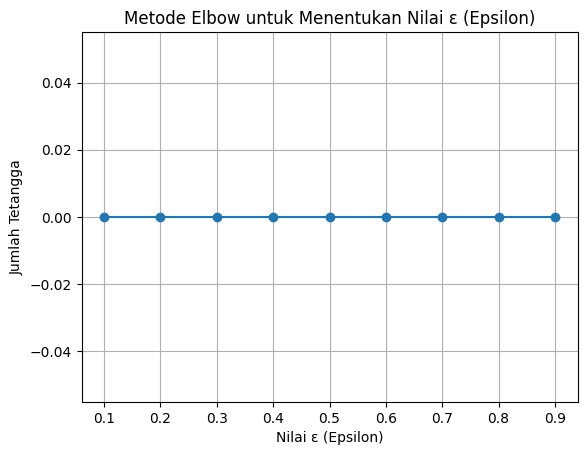

In [25]:
plt.plot(epsilon_values, num_neighbors, marker='o')
plt.xlabel('Nilai ε (Epsilon)')
plt.ylabel('Jumlah Tetangga')
plt.title('Metode Elbow untuk Menentukan Nilai ε (Epsilon)')
plt.grid(True)
plt.show()

Silhouette Coefficient DBSCAN: 0.826
Estimated number of clusters: 1
Estimated number of eps, minpts: 1.0, 5


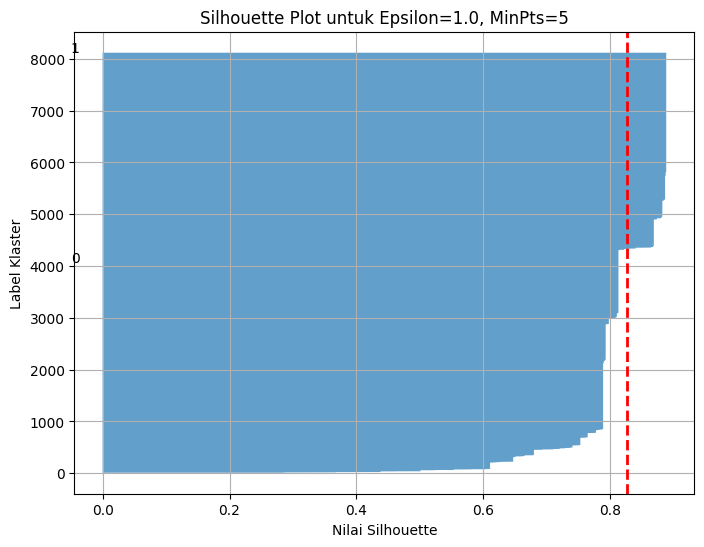

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics

dbscan = DBSCAN(eps=epsilon, min_samples=minpts)
dbscan_labels = dbscan.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, dbscan_labels)
silhouette_values = silhouette_samples(X_pca, dbscan_labels)

plt.figure(figsize=(8, 6))
y_lower = 10  # Nilai awal batas bawah pada plot

for i in range(len(set(dbscan_labels))):
    cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    
sidb = silhouette_score(X_pca,dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(X_pca, dbscan_labels):.3f}")
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {dbscan_n_clusters}")
print(f"Estimated number of eps, minpts: {best_epsilon}, {best_minpts}")

plt.title(f'Silhouette Plot untuk Epsilon={best_epsilon}, MinPts={best_minpts}')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


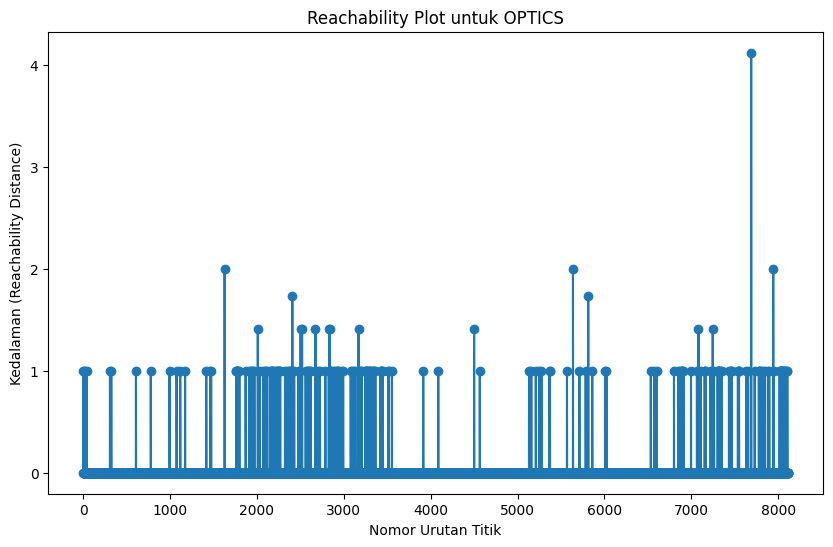

In [8]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

optics = OPTICS(min_samples=5)  # Sesuaikan dengan nilai `min_samples` yang sesuai
optics.fit(f_data)

reachability_distances = optics.reachability_
plt.figure(figsize=(10, 6))
plt.plot(reachability_distances, marker='o')
plt.xlabel('Nomor Urutan Titik')
plt.ylabel('Kedalaman (Reachability Distance)')
plt.title('Reachability Plot untuk OPTICS')
plt.show()


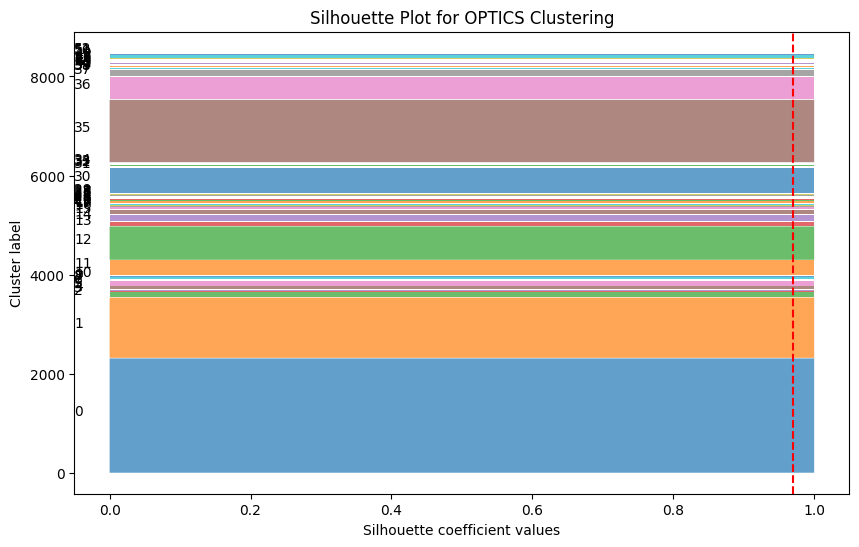

In [9]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_labels = optics.labels_
silhouette_avg = silhouette_score(f_data, cluster_labels)

# Penerapan OPTICS
cluster_labels = optics.labels_

# Hitung Silhouette Score untuk masing-masing titik
silhouette_values = silhouette_samples(f_data, cluster_labels)

# Hitung Silhouette Score rata-rata
silhouette_avg = silhouette_score(f_data, cluster_labels)

# Buat plot Silhouette
plt.figure(figsize=(10, 6))

y_lower = 10
for i in range(len(set(cluster_labels))):
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for OPTICS Clustering")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.show()

C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


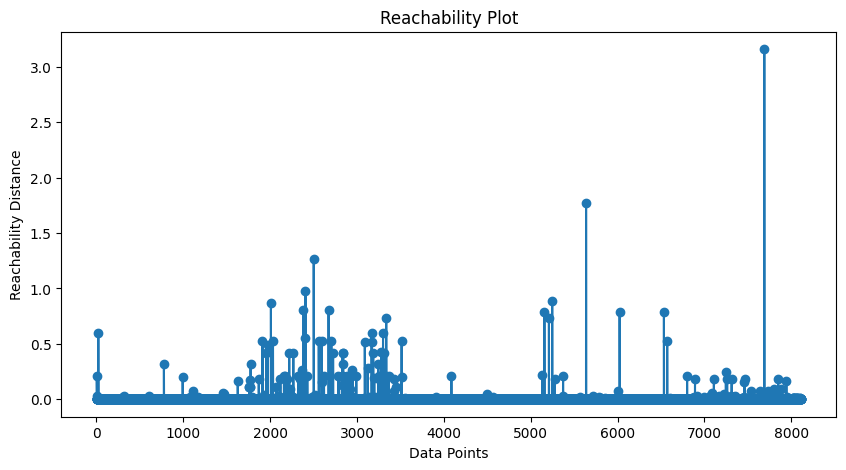

In [12]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Buat objek OPTICS dengan parameter yang sesuai
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Lakukan clustering pada data
clustering.fit(X_pca)

# Ambil reachability distances dari hasil clustering
reachability = clustering.reachability_

# Plot reachability plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(reachability)), reachability, marker='o', linestyle='-')
plt.title('Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
  5%|▌         | 1/20 [00:06<01:54,  6.05s/it]C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
 10%|█         | 2/20 [00:12<01:48,  6.04s/it]C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
 15%|█▌        | 3/20 [00:18<01:43,  6.08s/it]C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
 20%|██        | 4/20 [00:24

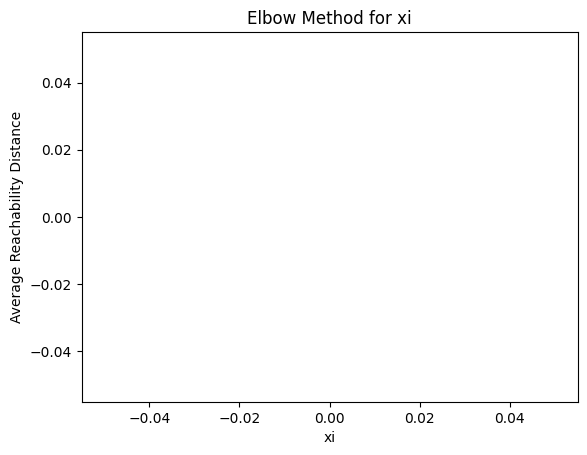

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.metrics import pairwise_distances_argmin_min
from tqdm import tqdm

# Define a range of xi values to test
xi_values = np.linspace(0.001, 1.0, num=20)

# Initialize an array to store the average reachability distance for each xi value
average_reachability_distances = []

# Run OPTICS for each xi value and calculate the average reachability distance
for xi in tqdm(xi_values):
    optics = OPTICS(xi=xi, min_samples=5)
    optics.fit(X)  # Replace X with your data
    core_distances = optics.core_distances_
    reachability_distances = optics.reachability_
    
    # Calculate average reachability distance
    average_distance = np.mean(reachability_distances)
    average_reachability_distances.append(average_distance)

# Plot the results
plt.plot(xi_values, average_reachability_distances, marker='o')
plt.xlabel('xi')
plt.ylabel('Average Reachability Distance')
plt.title('Elbow Method for xi')
plt.show()

In [8]:

# Hitung klaster dari reachability distance
threshold = 0.2  # Ambil nilai ambang sesuai kebutuhan Anda
clusters = []
current_cluster = []
for i, reach_dist in enumerate(reachability):
    if reach_dist <= threshold:
        current_cluster.append(i)
    else:
        if current_cluster:
            clusters.append(current_cluster)
        current_cluster = []

# Menambahkan klaster terakhir jika masih ada
if current_cluster:
    clusters.append(current_cluster)

# Cetak hasil klaster
for i, cluster in enumerate(clusters):
    print(f'Cluster {i + 1}: {cluster}'))

SyntaxError: unmatched ')' (3040518319.py, line 19)

C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


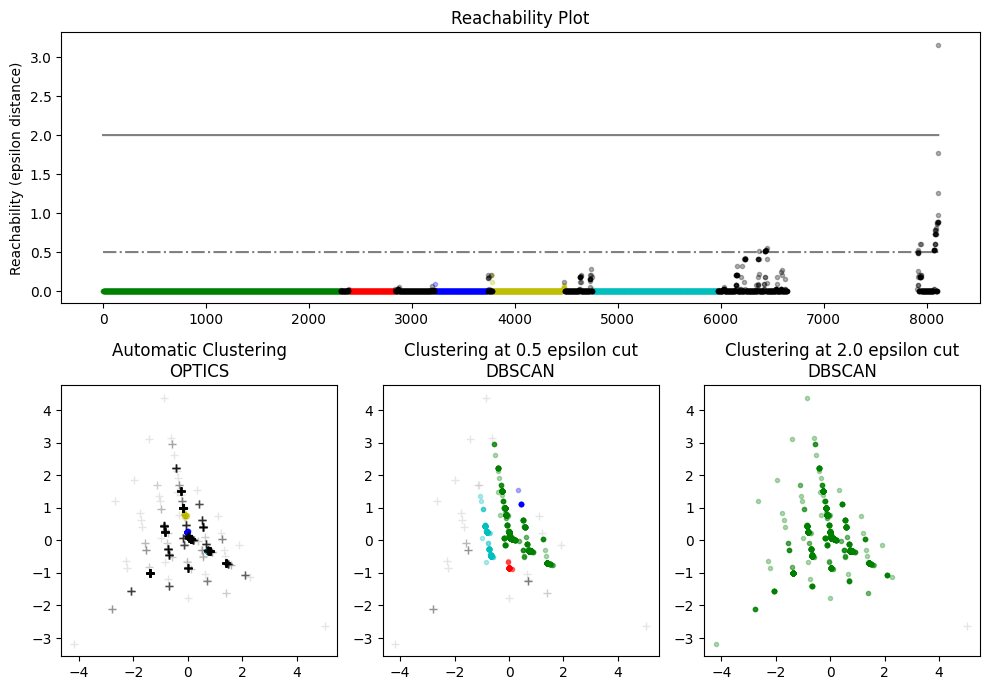

In [7]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan

clust = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)

X = X_pca

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

In [8]:
# Cluster using OPTICS

optics_labels = clust.labels_
reachability = clust.reachability_
optics_n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print("Estimated number of OPTICS clusters: %d" % optics_n_clusters)

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
# noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise_optics = sum(optics_labels == -1) / len(optics_labels)
# noise_optics_dbscan = sum(cluster == -1) / len(cluster)

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_optics = sum(optics_labels == -1) / len(optics_labels)
noise = noise_optics * 8114
print(f"Estimated number of noise: {noise:.0f}")

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

siop = silhouette_score(X,clust.labels_)
print(f"Silhouette Coefficient OPTICS: {siop}")
print(f"Silhouette Coefficient OPTICS: {metrics.silhouette_score(X, optics_labels):.3f}")

Estimated number of OPTICS clusters: 6
Estimated number of noise: 1655
Silhouette Coefficient OPTICS: 0.6508317883277617
Silhouette Coefficient OPTICS: 0.651


Silhouette Coefficient DBSCAN: 0.6508317883
Estimated number of clusters: 6
Estimated number of xi, minpts: 0.05, 5


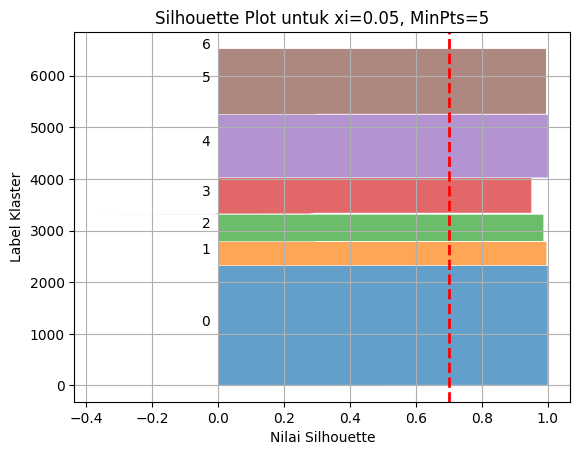

In [9]:
# clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Hitung Silhouette Score untuk masing-masing titik
silhouette_values = silhouette_samples(f_data, optics_labels)

# Hitung Silhouette Score rata-rata
silhouette_avg = silhouette_score(f_data, optics_labels)

y_lower = 10
for i in range(len(set(optics_labels))):
    cluster_silhouette_values = silhouette_values[optics_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi antar klaster
    
    
sidb = silhouette_score(X,clust.labels_)
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(X, optics_labels):.10f}")
optics_n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print(f"Estimated number of clusters: {optics_n_clusters}")
print(f"Estimated number of xi, minpts: 0.05, 5")

plt.title(f'Silhouette Plot untuk xi=0.05, MinPts=5')
plt.xlabel('Nilai Silhouette')
plt.ylabel('Label Klaster')
plt.grid(True)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.show()

In [52]:
# Hitung jumlah anggota dalam setiap kluster
unique_labels = set(optics_labels)
cluster_counts = {}

for label in unique_labels:
    if label == -1:
        cluster_counts["Noise"] = np.sum(optics_labels == label)
    else:
        cluster_counts[f"Cluster {label}"] = np.sum(optics_labels == label)

# Menampilkan hasil
for cluster, count in cluster_counts.items():
    print(f"{cluster}: {count} anggota")

Cluster 0: 2307 anggota
Cluster 1: 454 anggota
Cluster 2: 517 anggota
Cluster 3: 700 anggota
Cluster 4: 1216 anggota
Cluster 5: 1265 anggota
Noise: 1655 anggota


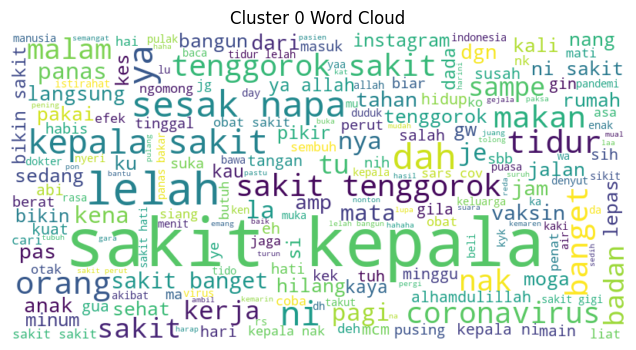

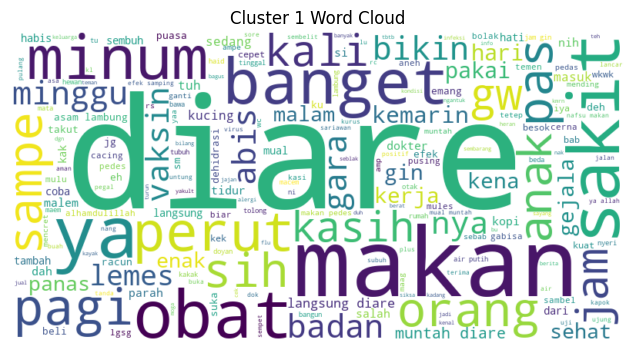

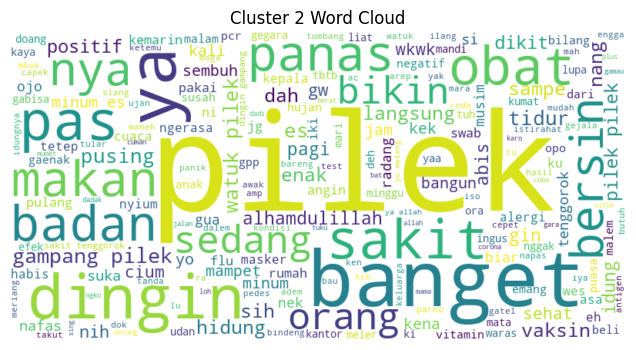

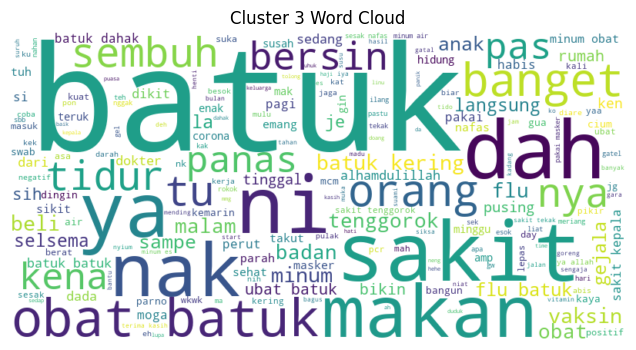

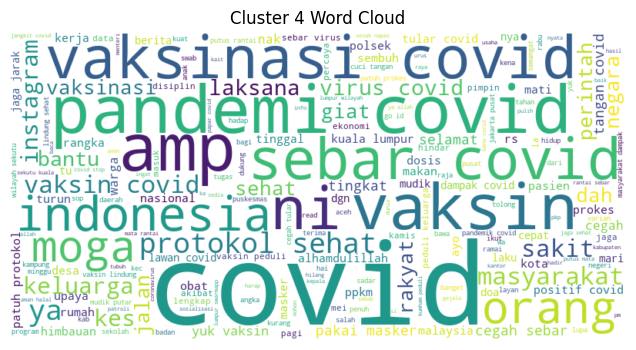

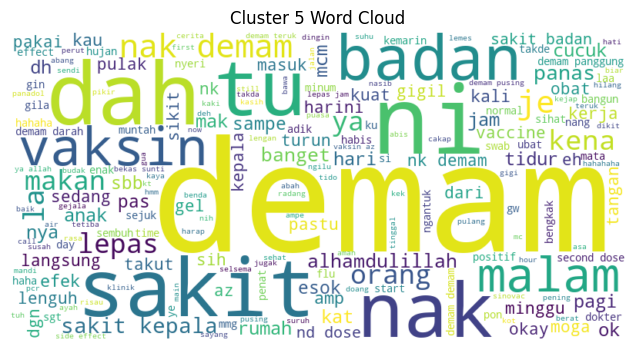

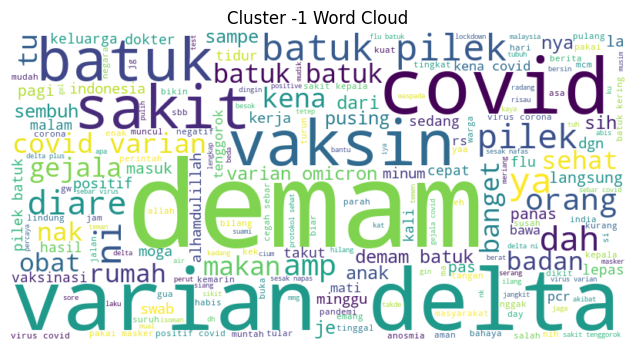

In [56]:
# Menyimpan teks dalam setiap kluster
cluster_texts = {}
for label in set(optics_labels):
    cluster_texts[label] = " ".join(df[optics_labels == label]['final_tweet'])

# Buat word cloud untuk setiap kluster
for label, text in cluster_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Tampilkan word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Cluster {label} Word Cloud")
    plt.axis("off")
    plt.show()

In [48]:
from wordcloud import WordCloud

# Hitung jumlah anggota dalam setiap kluster
unique_labels = set(optics_labels)
cluster_counts = {}

for label in unique_labels:
    if label == -1:
        cluster_counts["Noise"] = np.sum(optics_labels == label)
    else:
        cluster_counts[f"Cluster {label}"] = np.sum(optics_labels == label)

# Menampilkan hasil
for cluster, count in cluster_counts.items():
    print(f"{cluster}: {count} anggota")
    dfcloud = w
    reviews = ' '.join(cluster)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud Frequency', fontsize = 15, fontweight = 'bold', color = 'darkred')
    plt.savefig('Word Frequency Analysis.png')
    plt.show()

SyntaxError: unmatched ')' (1797970029.py, line 24)

In [45]:
dicts = cluster_counts.items()
dfcloud = pd.DataFrame(dicts)

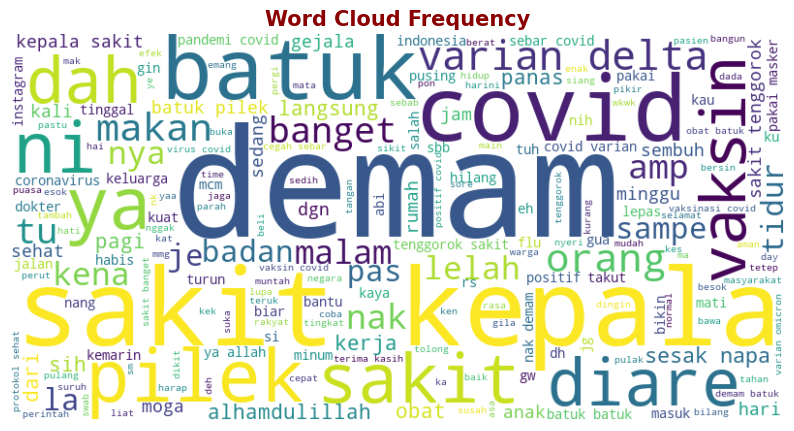

In [51]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

df['final_tweet'] = df['final_tweet'].apply(lambda x: str(x) if isinstance(x, (float, int)) else x)

# B. Word Frequency Analysis
reviews = ' '.join(df['final_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Frequency', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Word Frequency Analysis.png')
plt.show()

In [18]:
from wordcloud import WordCloud

def Plot_world(f_data):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [19]:
text = train.text.values

Plot_world(text)

NameError: name 'train' is not defined

In [17]:
from collections import Counter
from wordcloud import WordCloud

# # Inisialisasi dictionary untuk menyimpan kata-kata dalam setiap kluster
# cluster_words = {label: [] for label in set(optics_labels)}

# # Mengelompokkan kata-kata dalam kluster
# for i, label in enumerate(optics_labels):
#     cluster_words[label].extend(X[i].split())  # Menggabungkan kata-kata dalam kluster

# # Membuat Word Cloud untuk setiap kluster
# for label, words in cluster_words.items():
#     word_freq = Counter(words)
#     wordcloud = WordCloud().generate_from_frequencies(word_freq)

#     # Menampilkan Word Cloud
#     plt.figure(figsize=(8, 8))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Cluster {label} Word Cloud')
#     plt.axis("off")
#     plt.show()
    
cluster_texts = {label: [] for label in set(optics_labels)}

# Mengelompokkan teks dalam kluster
for i, label in enumerate(optics_labels):
    cluster_texts[label].append(X[i])

# Buat word cloud untuk setiap kluster
for label, text_list in cluster_texts.items():
    text = ' '.join(text_list)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Tampilkan word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Cluster {label} Word Cloud")
    plt.axis("off")
    plt.show()

TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [11]:
vals = optics_labels.value_counts()
print(vals)

# Menghitung jumlah cluster yang dihasilkan (termasuk noise)
n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)

# Inisialisasi dictionary untuk menyimpan anggota-anggota dalam setiap kluster
cluster_members = {i: [] for i in range(n_clusters)}

# Mengelompokkan anggota-anggota dalam kluster
for i, label in enumerate(optics_labels):
    if label != -1:
        cluster_members[label].append(X[i])  # X[i] adalah data anggota kluster

# Menampilkan anggota-anggota dalam setiap kluster
for cluster_id, members in cluster_members.items():
    print(f"Cluster {cluster_id}:")
    print(members)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [10]:
from sklearn.cluster import OPTICS

min_samples_values = [5, 10, 20]  # Sesuaikan nilai sesuai kebutuhan

best_silhouette_score = -1.0
best_min_samples = 0

for min_samples in min_samples_values:
    optics = OPTICS(min_samples=min_samples)
    optics.fit(f_data)
    cluster_labels = optics.labels_

    # Hitung Silhouette Score untuk setiap konfigurasi `min_samples`
    silhouette_avg = silhouette_score(f_data, cluster_labels)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_min_samples = min_samples

C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


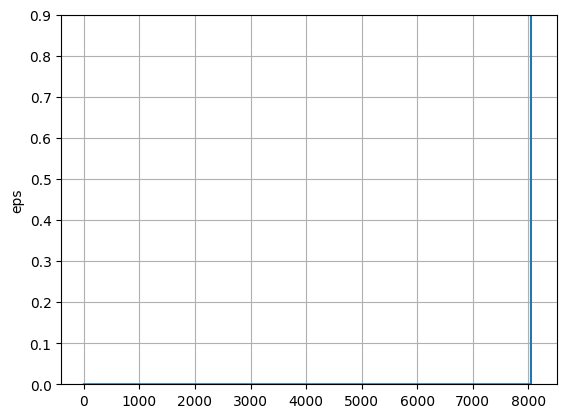

In [5]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 20, metric='euclidean')
neighbors_fit = neighbors.fit(f_data, y=None)
distances, indices = neighbors_fit.kneighbors(f_data)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.ylim(0, 0.9)
plt.plot(distances)
plt.ylabel('eps')
plt.grid()

C:\Users\fahmy\AppData\Local\Temp\ipykernel_7364\3170800385.py:10: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(p) #EUCLIDEAN DISTANCE


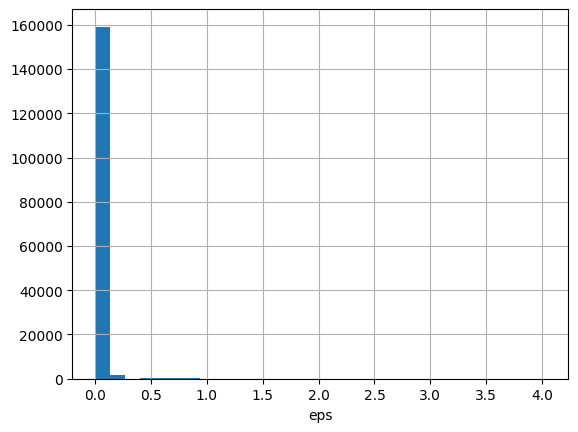

In [6]:
def k_distances2(x, k):
    """ Function to calculate distance of each point to its k-distance NearestNeighbors
        x: dataset
        k: #NN
    """
    
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p = -2*x.dot(x.T) + np.sum(x**2, axis = 1).T + np.repeat(np.sum(x**2, axis = 1),dim0, axis = 0).reshape(dim0,dim0)
    p = np.sqrt(p) #EUCLIDEAN DISTANCE
    p.sort(axis = 1)
    p = p[:,:k]
    pm = np.sort(p.flatten())
    
    return p, pm

m, m2 = k_distances2(X_pca, 20)

plt.hist(m2, bins = 30)
plt.xlabel('eps') #epsilon distance
plt.grid(True)

In [7]:
# Cluster using DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=20) #default parameters are eps = 0.5, min_samples = 5, metric = 'euclidean'
dbscan_labels = dbscan.fit_predict(X_pca)
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Estimated number of DBSCAN clusters: %d" % dbscan_n_clusters)

# Cluster using OPTICS
optics = OPTICS(min_samples=20)
optics.fit(X_pca)
optics_labels = optics.labels_
reachability = optics.reachability_
optics_n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print("Estimated number of OPTICS clusters: %d" % optics_n_clusters)


# # Cluster using cluster_optics_dbscan
# cluster = cluster_optics_dbscan(reachability=optics.reachability_, core_distances=optics.core_distances_, ordering=optics.ordering_, eps=0.5)
# cluster_n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
# print("Estimated number of OPTICS clusters: %d" % cluster_n_clusters)

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klasterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise_optics = sum(optics_labels == -1) / len(optics_labels)
# noise_optics_dbscan = sum(cluster == -1) / len(cluster)


print(noise_dbscan)
print(noise_optics)
# print(noise_optics_dbscan)
# print(dbscan_n_clusters)
# print(optics_n_clusters)
# print(cluster_n_clusters)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

sidb = silhouette_score(X_pca,dbscan.labels_)
siop = silhouette_score(X_pca,optics.labels_)
print(f"Silhouette Coefficient DBSCAN: {sidb}")
print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(X_pca, dbscan_labels):.3f}")
print(f"Silhouette Coefficient OPTICS: {siop}")
print(f"Silhouette Coefficient OPTICS: {metrics.silhouette_score(X_pca, optics_labels):.3f}")

Estimated number of DBSCAN clusters: 14


C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Estimated number of OPTICS clusters: 26
0.027360118314025142
0.027976337194971654
Silhouette Coefficient DBSCAN: 0.8891577187896256
Silhouette Coefficient DBSCAN: 0.889
Silhouette Coefficient OPTICS: 0.9430786017092396
Silhouette Coefficient OPTICS: 0.943


In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

sidb = silhouette_score(X_pca,dbscan.labels_)
siop = silhouette_score(X_pca,optics.labels_)
print(sidb)
print(siop)


print(f"Silhouette Coefficient DBSCAN: {metrics.silhouette_score(X_pca, dbscan_labels):.3f}")
print(f"Silhouette Coefficient OPTICS: {metrics.silhouette_score(X_pca, optics_labels):.3f}")

0.8891577187896256
0.9430786017092396
Silhouette Coefficient DBSCAN: 0.889
Silhouette Coefficient OPTICS: 0.943


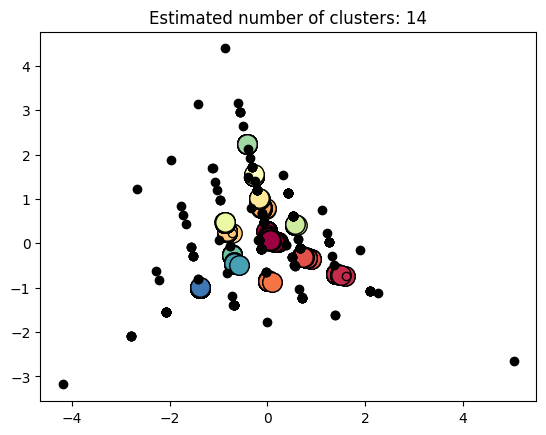

In [9]:
unique_labels = set(dbscan_labels)
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbscan_labels == k

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {dbscan_n_clusters}")
plt.show()

C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


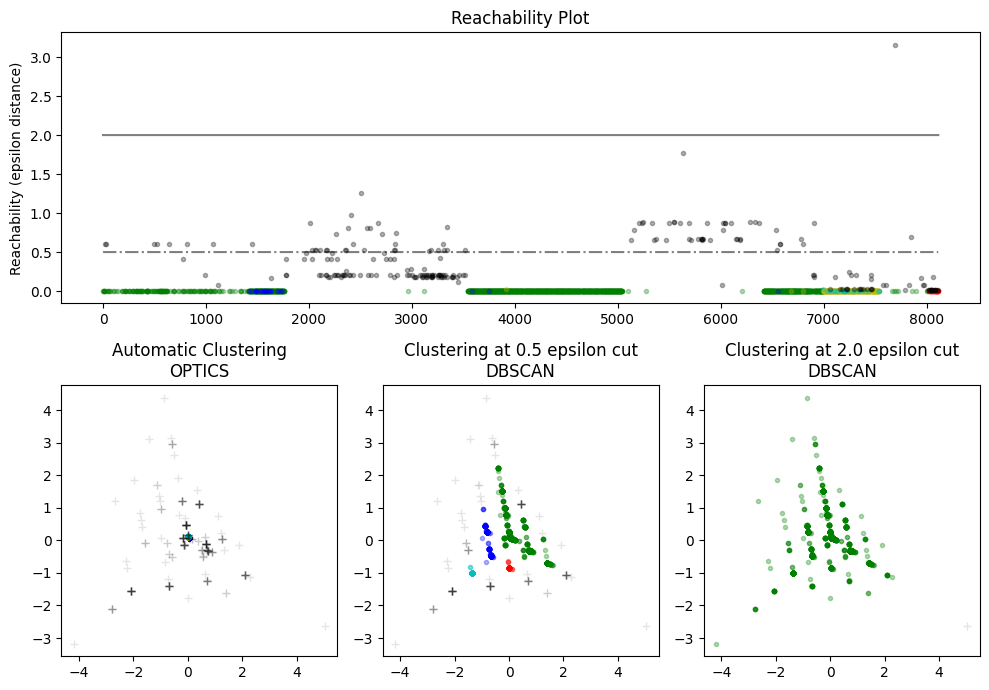

In [10]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

clust.fit(X_pca)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)

labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X_pca))
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[optics_labels == klass]
    Rk = reachability[optics_labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[optics_labels == -1], reachability[optics_labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X_pca[optics.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X_pca[optics.labels_ == -1, 0], X_pca[optics.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X_pca[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X_pca[labels_050 == -1, 0], X_pca[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X_pca[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X_pca[labels_200 == -1, 0], X_pca[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

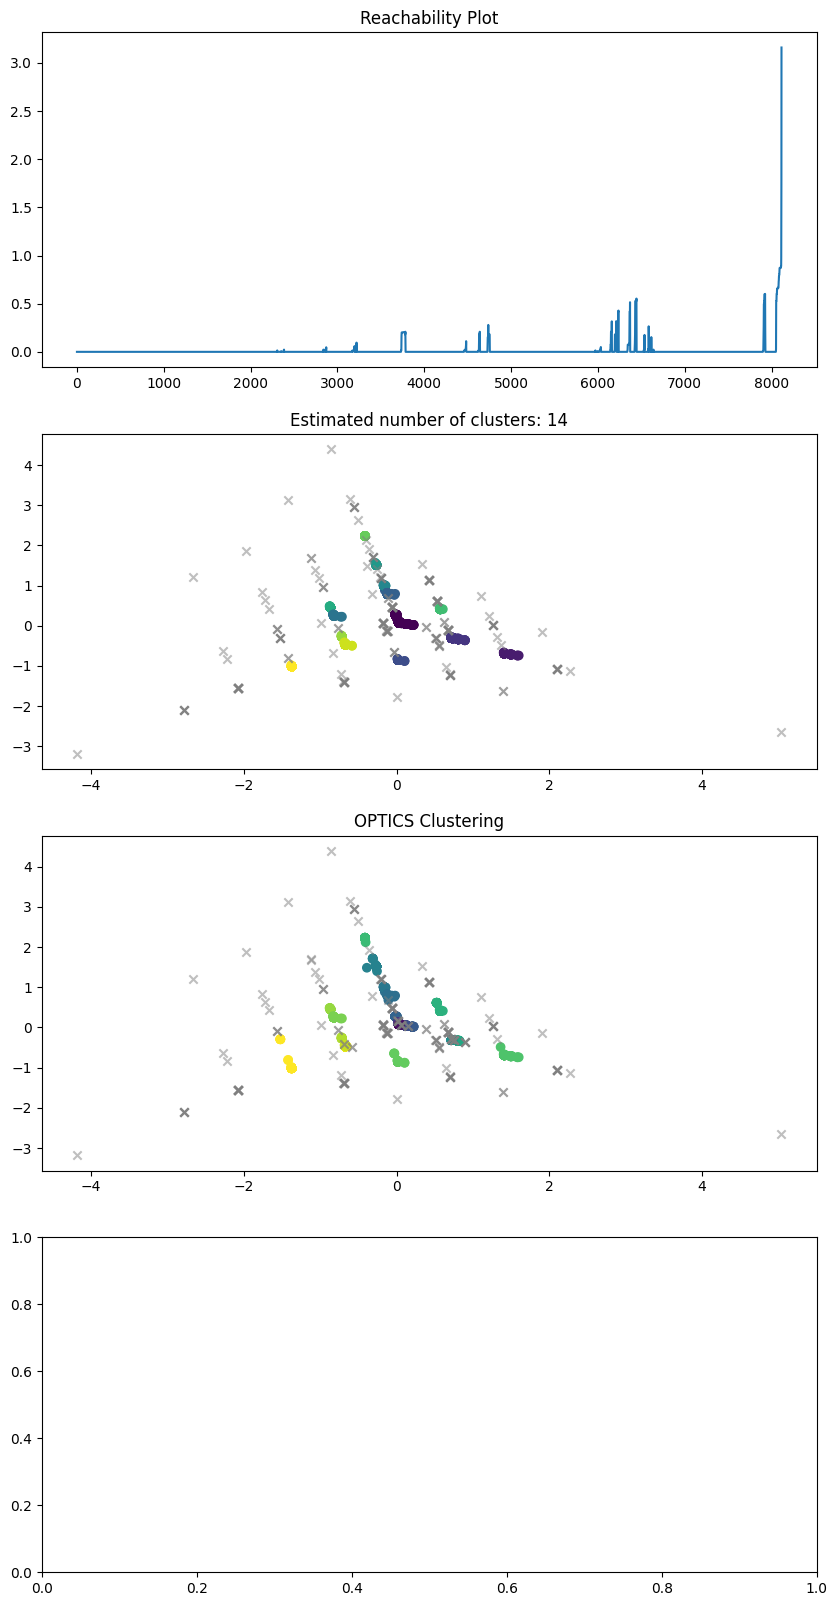

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
axs[0].plot(np.arange(len(reachability)), reachability[optics.ordering_])
axs[0].set_title("Reachability Plot")
axs[1].scatter(X_pca[dbscan_labels!=-1, 0], X_pca[dbscan_labels!=-1, 1], c=dbscan_labels[dbscan_labels!=-1], cmap='viridis')
axs[1].scatter(X_pca[dbscan_labels==-1, 0], X_pca[dbscan_labels==-1, 1], c='grey', alpha=0.5, marker='x')
axs[1].set_title(f"Estimated number of clusters: {dbscan_n_clusters}")
axs[2].scatter(X_pca[optics_labels!=-1, 0], X_pca[optics_labels!=-1, 1], c=optics_labels[optics_labels!=-1], cmap='viridis')
axs[2].scatter(X_pca[optics_labels==-1, 0], X_pca[optics_labels==-1, 1], c='grey', alpha=0.5, marker='x')
axs[2].set_title("OPTICS Clustering")
# axs[3].scatter(X_pca[cluster!=-1, 0], X_pca[cluster!=-1, 1], c=cluster[cluster!=-1], cmap='viridis')
# axs[3].scatter(X_pca[cluster==-1, 0], X_pca[cluster==-1, 1], c='grey', alpha=0.5, marker='x')
# axs[3].set_title("Cluster_OPTICS_DBSCAN Clustering")
plt.show()

In [14]:
id_data["label"] = dbscan_labels
import geopandas as gpd
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(id_data, geometry=gpd.points_from_xy(id_data['longitude'], id_data['latitude']))
gdf

C:\Users\fahmy\AppData\Local\Temp\ipykernel_7364\2935700447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_data["label"] = dbscan_labels


,latitude,longitude,username,final_tweet,label,geometry
0,24.972077,67.064381,MaseebAkhter,rd jumma mubarak,0,POINT (67.06438 24.97208)
1,-3.190822,104.794609,PolsekPlaju3,lawan covid sinergitas tni polri cegah tular c...,1,POINT (104.79461 -3.19082)
2,31.315389,74.222395,irfania_real,jummah mubarak,0,POINT (74.22239 31.31539)
3,-2.455096,111.930698,kenny_thok,semangat ya neng isolasi pakai sek pondok deri...,0,POINT (111.93070 -2.45510)
4,0.902542,100.308263,kejarirohul,kamis tanggal april kepala seksi intelijen ari...,2,POINT (100.30826 0.90254)
...,...,...,...,...,...,...
8109,-6.297602,106.770437,StellaSuwardi,vaksinasi booster tingkat imunitas varian omic...,0,POINT (106.77044 -6.29760)
8110,-6.364100,106.799599,natasya_puspa4,jokowi menteri waspada hati hati varian omicro...,2,POINT (106.79960 -6.36410)
8111,-6.301652,106.974561,Agistasyahka,sebar virus omicron ba ba cepat banding varian...,0,POINT (106.97456 -6.30165)
8112,-7.776581,113.198255,Ardi_Wdyto,varian omicron,0,POINT (113.19826 -7.77658)


In [15]:
import folium
from matplotlib import colors

# Create a map centered on the first point in the GeoDataFrame
m = folium.Map(location=[gdf['latitude'][0], gdf['longitude'][0]], zoom_start=5)

colors = ['black', 'pink', 'green', 'beige', 'orange', 'lightgray', 'lightblue', 'purple', 'darkpurple', 'cadetblue', 'lightgreen', 'white', 'darkred', 'darkblue', 'lightred', 'blue', 'red', 'darkgreen', 'gray']

for idx, row in gdf.iterrows():
    if idx == 200:
        break        
    color = colors[row['label']]
    if row['label'] > -1:
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['username'] +': \n'+ row['final_tweet'],
                  icon=folium.Icon(color=color)).add_to(m)   
m